## 加载模块

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from public_tests import *

plt.rcParams['figure.figsize'] = (5.0, 4.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 加载数据集

In [26]:
np.random.seed(1)
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [27]:
# 数据集信息
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
(m_train, h_px, w_px, n_ch) = train_x_orig.shape

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print(f"Number of training examples: {m_train}")
print(f"Each image is of size: ({h_px}, {w_px}, {n_ch})")
print(f"train_x_orig shape: {train_x_orig.shape}")
print(f"train_x's shape: {train_x.shape}")
print(f"train_y shape: {train_y.shape}\n")

print(f"Number of testing examples: {m_test}")
print(f"test_x_orig shape: {test_x_orig.shape}")
print(f"test_x's shape: {test_x.shape}")
print(f"test_y shape: {test_y.shape}")

Number of training examples: 209
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_x's shape: (12288, 209)
train_y shape: (1, 209)

Number of testing examples: 50
test_x_orig shape: (50, 64, 64, 3)
test_x's shape: (12288, 50)
test_y shape: (1, 50)


Text(0.5, 1.0, 'y = 0. It\'s a "non-cat" picture.')

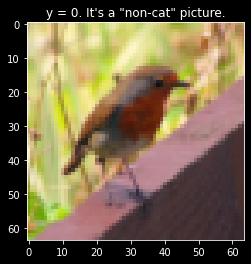

In [29]:
# 显示样本样张
index = 10
plt.imshow(train_x_orig[index])

note = classes[train_y[0, index]].decode("utf-8")
plt.title(f"y = {train_y[0, index]}. It's a \"{note}\" picture.")

## 两层网络

In [41]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        # 前向过程
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")  # 没有分batch，全部拿来训练
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")

        # 计算交叉熵损失函数
        cost = compute_cost(A2, Y)  # 按样本数平均
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        parameters = update_parameters(parameters, grads, learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print(f"Cost after iteration {i:4d}: {np.squeeze(cost):.4f}")
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs


def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [42]:
n_x = h_px * w_px * n_ch  # 输入层 12288
n_h = 7  # 隐藏层
n_y = 1  # 输出层
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

parameters, costs = two_layer_model(train_x, train_y, layers_dims=layers_dims, num_iterations=2, print_cost=False)
print(f"Cost after first iteration: {costs[0]:.4f}")

Cost after iteration    1: 0.6926
Cost after first iteration: 0.6930


In [6]:
two_layer_model_test(two_layer_model)

Cost after iteration    1: 0.6916
Cost after iteration    1: 0.6916
Cost after iteration    1: 0.6916
Cost after iteration    2: 0.6524
 All tests passed.


Cost after iteration    0: 0.6930
Cost after iteration  100: 0.6464
Cost after iteration  200: 0.6325
Cost after iteration  300: 0.6015
Cost after iteration  400: 0.5602
Cost after iteration  500: 0.5158
Cost after iteration  600: 0.4755
Cost after iteration  700: 0.4339
Cost after iteration  800: 0.4008
Cost after iteration  900: 0.3581
Cost after iteration 1000: 0.3394
Cost after iteration 1100: 0.3053
Cost after iteration 1200: 0.2749
Cost after iteration 1300: 0.2468
Cost after iteration 1400: 0.1985
Cost after iteration 1500: 0.1745
Cost after iteration 1600: 0.1708
Cost after iteration 1700: 0.1131
Cost after iteration 1800: 0.0963
Cost after iteration 1900: 0.0834
Cost after iteration 2000: 0.0744
Cost after iteration 2100: 0.0663
Cost after iteration 2200: 0.0592
Cost after iteration 2300: 0.0534
Cost after iteration 2400: 0.0486
Cost after iteration 2499: 0.0442


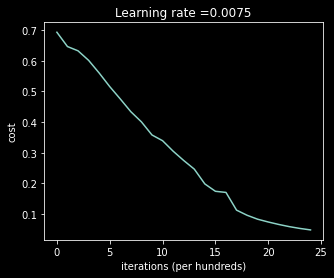

In [22]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), num_iterations=2500, print_cost=True)
plot_costs(costs, learning_rate)

In [10]:
predictions_train = predict(train_x, train_y, parameters)
predictions_test = predict(test_x, test_y, parameters)
layers_dims = [12288, 20, 7, 5, 1]

Accuracy: 0.6172
Accuracy: 0.3600


In [17]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print(f"Cost after iteration {i:4d}: {np.squeeze(cost):.4f}")
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

In [19]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations=1, print_cost=False)
print(f"Cost after first iteration: {costs[0]:.4f}")

L_layer_model_test(L_layer_model)

Cost after iteration    0: 0.7717
Cost after first iteration: 0.7717
Cost after iteration    1: 0.7071
Cost after iteration    1: 0.7071
Cost after iteration    1: 0.7071
Cost after iteration    2: 0.7063
 All tests passed.


In [20]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)

pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Cost after iteration    0: 0.7717
Cost after iteration  100: 0.6721
Cost after iteration  200: 0.6483
Cost after iteration  300: 0.6115
Cost after iteration  400: 0.5670
Cost after iteration  500: 0.5401
Cost after iteration  600: 0.5279
Cost after iteration  700: 0.4655
Cost after iteration  800: 0.3691
Cost after iteration  900: 0.3917
Cost after iteration 1000: 0.3152
Cost after iteration 1100: 0.2727
Cost after iteration 1200: 0.2374
Cost after iteration 1300: 0.1996
Cost after iteration 1400: 0.1893
Cost after iteration 1500: 0.1612
Cost after iteration 1600: 0.1482
Cost after iteration 1700: 0.1378
Cost after iteration 1800: 0.1297
Cost after iteration 1900: 0.1212
Cost after iteration 2000: 0.1138
Cost after iteration 2100: 0.1078
Cost after iteration 2200: 0.1029
Cost after iteration 2300: 0.1009
Cost after iteration 2400: 0.0929
Cost after iteration 2499: 0.0884
Accuracy: 0.9856
Accuracy: 0.8000


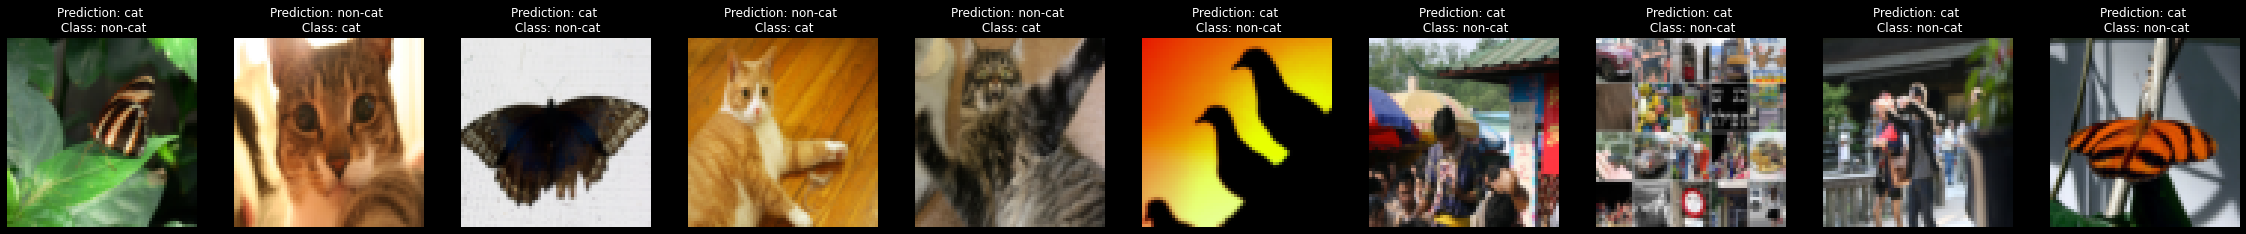

In [21]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

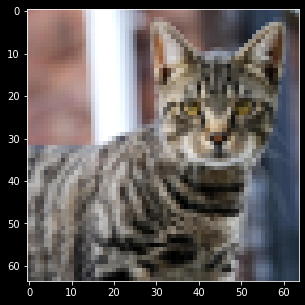

In [34]:
my_image = "cat.jpg"
my_label_y = [1]

fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.figure(figsize=(5,5))
plt.imshow(image)

In [35]:
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)

note = classes[int(np.squeeze(my_predicted_image)), ].decode("utf-8")
print(f"y = {np.squeeze(my_predicted_image):.4f}, your L-layer model predicts a \"{note}\" picture.")


Accuracy: 1.0000
y = 1.0000, your L-layer model predicts a "cat" picture.
